## Overview

The goal of a recommendation system is to expose people to items that they will like. In exact terms, a recommendation system predicts the future preference of a set of items for a user, and recommends the top items from this set. In today's world, due to the internet and its global reach, people have more options to choose from than ever before.

Consider buying an album from a traditional music store where the options are always limited and mainly depend upon size and type of the store. There is a physical limitation to how many songs, albums, and artists can be offered. An online product like Spotify, however has a much higher ceiling in terms of storage space. With this new method of selecting products, recommendation systems are a popular way for users to sort through millions of songs to find the ones that are customized exactly for them. Recommendation systems cast a direct impact on profitability and customer satisfaction for most businesses today. With the nearly limitless options consumers have for products online, they need some guidance!

This idea can be represented by a concept called the "Long Tail," which is a set of statistical distributions that have a very long "tail" of the distribution, representing many occurrences of low frequency things. In the context of consumer products, there are some products that everyone is going to buy: light bulbs, toilet paper, bread etc. There are also items that are far more obscure: specific toys, sports equipment, movies. Recommendation systems are made to help consumers tap into this long tail to assist them in picking from the endless number of options that are made available to them via the internet.

<div>
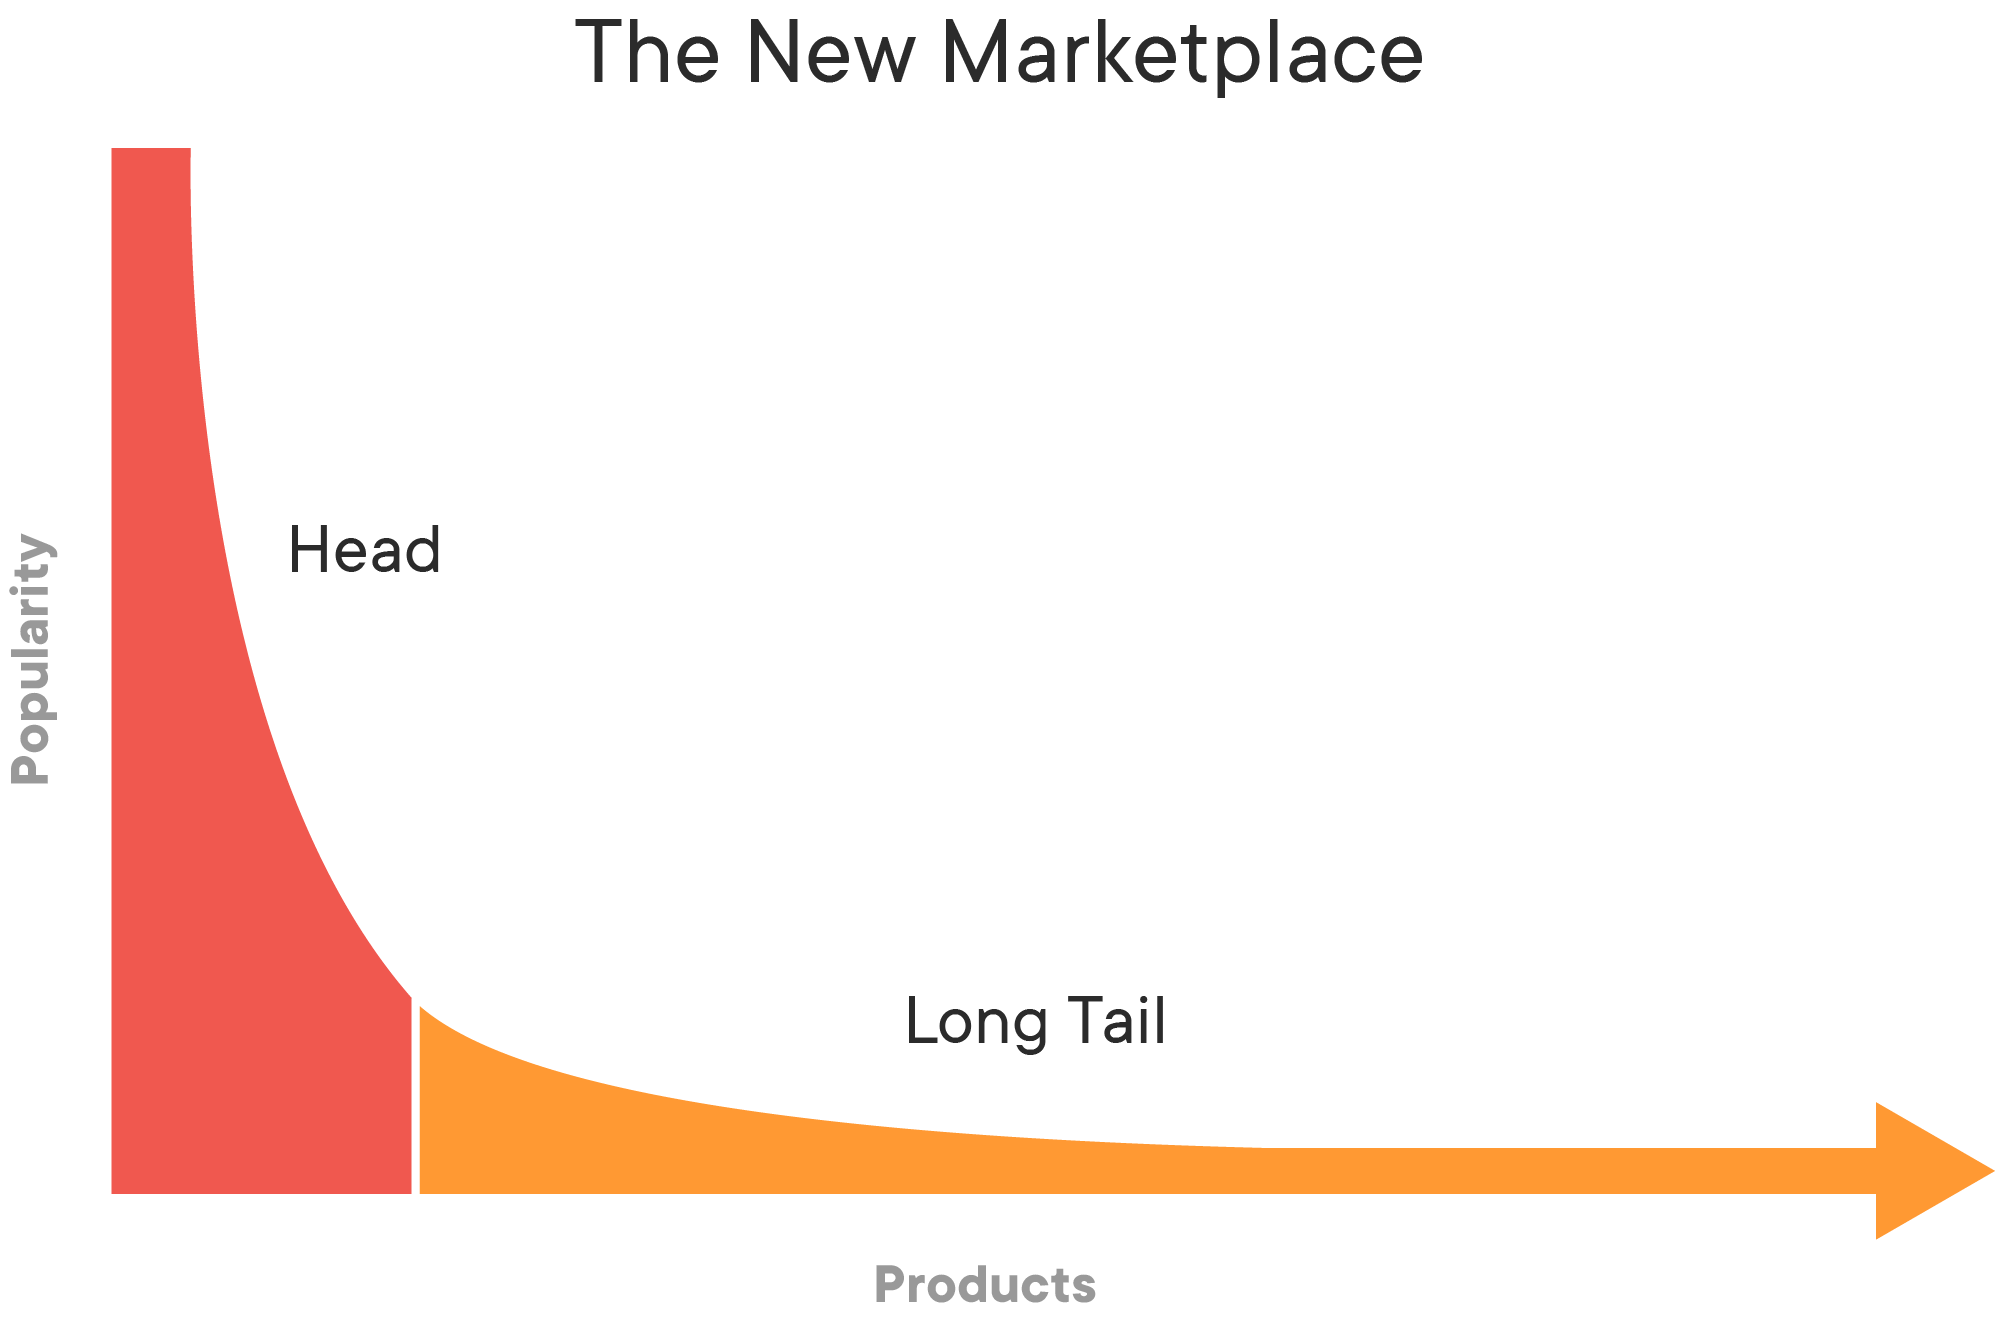
</div>

Here's a formal definition of recommendation systems from authors [Bo Xiao and Izak Benbasat, 2017](https://misq.umn.edu/e-commerce-product-recommendation-agents-use-characteristics-and-impact.html):

> "Recommendation Systems are software agents that elicit the interests and preferences of individual consumers […] and make recommendations accordingly. They have the potential to support and improve the quality of the decisions consumers make while searching for and selecting products online."

## Recommendation System Approaches

There are two main types of recommendation systems: unpersonalized and personalized. This project will focus on personalized recommendation systems because that's where data scientists can provide the most value to companies, but to start off, let's investigate some unpersonalized systems because they can be productive in their own right.

### Type #1: Unpersonalized Recommendations

Unpersonalized recommendation systems have been happening since way before machine learning was ever in the public knowledge base. An example of an unpersonalized recommendation would be on YouTube when it recommends the most viewed videos. These are videos that the most people have watched. For the most part, these recommendations aren't too bad. After all, there's a reason why things are popular. This approach, however, is not going to help more niche videos get exposure. It also won't be immensely beneficial to those who have very particular tastes. Of course, there are times when a simple approach like this might be best. An example of a simple popularity recommender working well is with the news. There's a high chance that everyone who visits a news website is going to want to see whatever is the most popular at that moment in time.

### Type #2: Personalized Recommendations

According to Todd Yellin, Netflix’s vice president of product innovation:

> “Personalization is about creating the right connection between a viewer and their content.”
> [SOURCE](https://www.altexsoft.com/blog/recommender-system-personalization/)

In other words, personalization is the way to match the right types of services, products, or content to the right users. When approached appropriately, it helps improve user engagement — any interactions people have with a product, website, app, etc.

These days, the true power of customer experience personalization can be realized with the help of machine learning. By utilizing ML algorithms and data, it is possible to create smart models that can precisely predict customer intent and as such provide quality one-to-one recommendations.

At the same time, the continuous growth of available data has led to information overload — when too many choices complicate decision-making. Primarily developed to help users deal with the large range of choices they encounter, recommender systems come into play.

Recommender systems, also known as recommender engines, are information filtering systems that provide individual recommendations in real-time. As powerful personalization tools, recommendation systems leverage machine learning algorithms and techniques to give the most relevant suggestions to particular users by learning data (e.g., past behaviors) and predicting current interests and preferences.

<div>
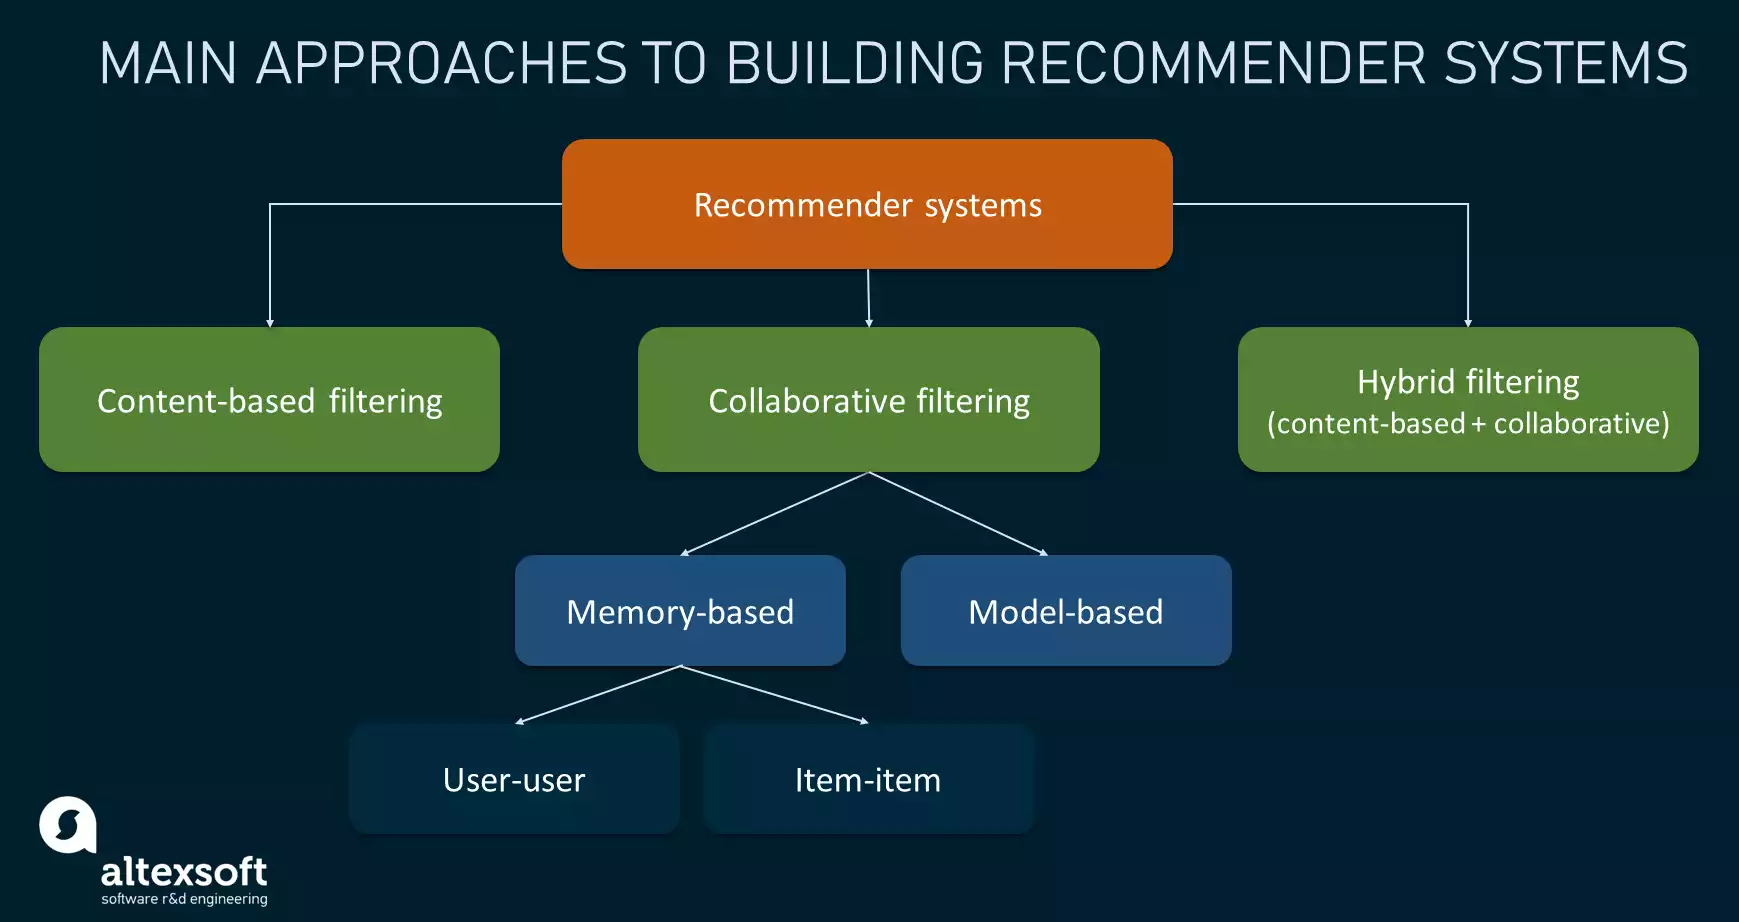
</div>

This project is going to use all 3 main approaches to predict what movie a user would prefer:

* **Content-based filtering**, which generates predictions by analyzing item attributes and searching for similarities between them
* **Collaborative filtering**, which generates predictions by analyzing user behavior and matching users with similar tastes
* **Hybrid filtering**, which combines two or more models.

Now that we have a general overview of what a recommendation system is and how it works, let's dive in to our data.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import squarify
%matplotlib inline

## Load the Data

First, we need to import all of the data. This project is going to use 4 datasets, some of which have multiple files within them:

1. [MovieLens 100K](https://grouplens.org/datasets/movielens/latest/)
  * `links`
  * `movies`
  * `ratings`
  * `tags` - I DONT THINK WE NEED THIS
2. [Wikipedia Movie Plots](https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots)
  * `wiki_movie_plots_deduped`
3. [IMDB](https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset)
  * `ratings_data`
  * `basic_name_data` - I DONT THINK WE NEED THIS
  * `title_basics_data`
  * `title_data` - I DONT THINK WE NEED THIS
  * `title_principals_data` - I DON'T THINK WE NEED THIS
4. [Streaming Platforms](https://www.kaggle.com/datasets/javagarm/movies-on-ott-platforms)
  * `MoviesOnStreamingPlatforms_updated`

## 1. MovieLens 100K Data

There are 4 files within the MovieLens 100K dataset:

  * `links`
  * `movies`
  * `ratings`
  * `tags` - DONT THINK WE NEED THIS

In [2]:
# Load the data
links_df = pd.read_csv('Data/MovieLens/ml-latest-small/links.csv')

# Preview the data
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
# Load the data
movies_df = pd.read_csv('Data/MovieLens/ml-latest-small/movies.csv')

# Preview the data
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Load the data
ratings_df = pd.read_csv('Data/MovieLens/ml-latest-small/ratings.csv')

# Preview the data
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# # Load the data
# tags_df = pd.read_csv('Data/MovieLens/ml-latest-small/tags.csv')

# # Preview the data
# tags_df.head()

## 2. Wikipedia Data

There is 1 file within the Wikipedia Data set: `wiki_movie_plots_deduped`.

In [6]:
# Load the data
plots_df = pd.read_csv('Data/Wikipedia Movie Plots/wiki_movie_plots_deduped.csv')

# Preview the data
plots_df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


## 3. IMDB Data

There are 5 files within the IMDB Data set:

  * `ratings_data`
  * `basic_name_data` - I DONT THINK WE NEED THIS
  * `title_basics_data`
  * `title_data` - I DONT THINK WE NEED THIS
  * `title_principals_data` - I DON'T THINK WE NEED THIS

In [7]:
# Load the data
imdb_ratings_df = pd.read_csv('Data/IMDB/ratings_data.tsv', sep='\t')

# Preview the data
imdb_ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1923
1,tt0000002,5.8,259
2,tt0000003,6.5,1737
3,tt0000004,5.6,174
4,tt0000005,6.2,2550


In [8]:
# # Load the data
# name_df = pd.read_csv('Data/IMDB/basic_name_data.tsv', sep='\t')

# # Preview the data
# name_df.head()

In [9]:
# Load the data
title_basics_df = pd.read_csv('Data/IMDB/title_basics_data.tsv', sep='\t', low_memory=False)

# Preview the data
title_basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [10]:
# # Load the data
# title_df = pd.read_csv('Data/IMDB/title_data.tsv', sep='\t', low_memory=False)

# # Preview the data
# title_df

In [11]:
# # Load the data
# title_principals_df = pd.read_csv('Data/IMDB/title_principals_data.tsv', sep='\t')

# # Preview the data
# title_principals_df

## 4. Streaming Platform Data

There is 1 file within the OTT Streaming Platform Data set: `MoviesOnStreamingPlatforms_updated`.

In [12]:
# Load the data
streaming_df = pd.read_csv('Data/Streaming Platforms/MoviesOnStreamingPlatforms_updated.csv')

# Preview the data
streaming_df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


## Merge The Datasets

Now that we have all of our data loaded, we need to start organizing them into forms that will work for our recommendation engines and also merge them into one big dataframe.

Let's start with the `title_basics_df`.

In [13]:
print('Title Basics Dataframe Shape:', title_basics_df.shape, '\n')

# Preview types of titles
print(title_basics_df['titleType'].value_counts())

Title Basics Dataframe Shape: (9389356, 9) 

tvEpisode       7091360
short            901062
movie            627705
video            267519
tvSeries         234495
tvMovie          138357
tvMiniSeries      46065
tvSpecial         39207
videoGame         32838
tvShort           10746
tvPilot               2
Name: titleType, dtype: int64


As we can see above, `title_basics_df` includes amost 10 million rows with all types of media options:

* `tvEpisode`
* ` short`
* `movie`
* `video`
* `tvSeries`
* `tvMovie`
* `tvMiniSeries`
* `tvSpecial`
* `videoGame`
* `tvShort`
* `tvPilot`

We are only interested in the `movie` title type so let's filter down this dataframe to only include those options.

In [14]:
# Filter titles to only contain 'movies'
title_basics_df = title_basics_df.loc[title_basics_df['titleType'].str.contains('movie')]

# Preview the filtering
title_basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama


In [15]:
# Check if it worked
title_basics_df['titleType'].value_counts()

movie    627705
Name: titleType, dtype: int64

Now that we only have the titleType of `movies` let's start pairing this dataframe down to only the information we need and work on merging it with the other dataset from IMDB. Luckily, it looks like we have a matching column in both dataframes titled `tconst`.

In [16]:
# Merge the datasets on `tconst`
imdb_df = pd.merge(title_basics_df, imdb_ratings_df, on='tconst')

# Preview new dataframe
imdb_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,200
1,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.2,14
2,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,796
3,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.1,20
4,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.3,23


In [17]:
# Checking for missing values
imdb_df.isna().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
dtype: int64

It looks like our IMDB dataframe is ready to go.

Now let's try merging together the three dataframes from the MovieLens 100K dataset.

In [18]:
# Merge the datasets on `movieId`
movielens_df = pd.merge(links_df, movies_df, on='movieId')

# Merge the datasets on `movieId`
movielens_df = pd.merge(movielens_df, ratings_df, on='movieId')

# Preview the results
movielens_df

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...,...,...
100831,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805
100834,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [19]:
# Checking for missing values
movielens_df.isna().sum()

movieId       0
imdbId        0
tmdbId       13
title         0
genres        0
userId        0
rating        0
timestamp     0
dtype: int64

We won't be using the `tmdbId` column so we can drop that entirely from our dataframe.

In [20]:
# Drop the column
movielens_df.drop('tmdbId', axis=1, inplace=True)

In [21]:
# Checking if it worked
movielens_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   imdbId     100836 non-null  int64  
 2   title      100836 non-null  object 
 3   genres     100836 non-null  object 
 4   userId     100836 non-null  int64  
 5   rating     100836 non-null  float64
 6   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 6.2+ MB


Unfortunately we do not have a 100% distinct column in both the `movielens_df` and `imdb_df` dataframes. 

However, the column `imdbId` from `movielens_df` is appropriate to use for matching this dataset to the `imdb_df` dataset using `tconst`. Let's take a look at this below:

In [22]:
# Preview the first line
movielens_df[:1]

,movieId,imdbId,title,genres,userId,rating,timestamp
0,1,114709,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703


As we can see, Toy Story has an `imdbId` of `114709`. What is even better is that this matches up with the link to Toy Story on IMDB's website.

> Toy Story: https://www.imdb.com/title/tt0114709/

Let's see if Toy Story appears in our `imdb_df`.

In [23]:
# Check for `imdbId` value
imdb_df.loc[imdb_df['tconst'].str.contains('114709')]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
62400,tt0114709,movie,Toy Story,Toy Story,0,1995,\N,81,"Adventure,Animation,Comedy",8.3,989855


Well that actually works well for us. Before going any further, let's try looking at some additional examples:

In [24]:
# Pull another random sample
movielens_df[2989:2990]

,movieId,imdbId,title,genres,userId,rating,timestamp
2989,80,112445,"White Balloon, The (Badkonake sefid) (1995)",Children|Drama,606,4.0,1171409272


In [25]:
# Cross reference the `movieId`
imdb_df.loc[imdb_df['tconst'].str.contains('112445')]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
61219,tt0112445,movie,The White Balloon,Badkonake sefid,0,1995,\N,85,"Drama,Family",7.6,7694
154801,tt11244558,movie,A Thousand Little Cuts,A Thousand Little Cuts,0,2022,\N,87,Thriller,5.0,360


Well that is interesting. We have two `tconst` matches for our one `movieId` column.

After doing a little digging, it is easy to tell that all of the movies we are looking for start with the `tconst` of `tt0`. Let's drop all of the rows from our `imdb_df` that do not include that code:

In [26]:
# Preview the original shape
imdb_df.shape

(283270, 11)

In [27]:
# Filter out movies not containing `tt0`
imdb_df = imdb_df.loc[imdb_df['tconst'].str.contains('tt0')]

print(imdb_df.shape, '\n')
imdb_df.head()

(145092, 11) 



,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,200
1,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.2,14
2,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,796
3,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.1,20
4,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.3,23


It appears that we filtered out about ~50% of the rows from our `imdb_df`. However, now we should not have any overlaps when we are trying to merge our two datasets. 

In order to merge the two datasets, we need to change the `imdbId` column into an string so it matches `tconst`. Let's drop the first 3 digits from our `tconst` column so it will match `imdbId` and then change the `imdbId` column to a string.

In [28]:
# Slice each column in `tconst`
imdb_df['tconst'] = imdb_df['tconst'].str[3:]

# Preview the results
imdb_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,200
1,000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.2,14
2,000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,796
3,000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.1,20
4,000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.3,23


In [29]:
# Change `imdbId` to a string
movielens_df['imdbId'] = movielens_df['imdbId'].astype('str')

In [30]:
# Merge the two datasets
movielens_imdb = pd.merge(movielens_df, imdb_df, left_on='imdbId', right_on='tconst')

# Preview the results
movielens_imdb.head()

,movieId,imdbId,title,genres_x,userId,rating,timestamp,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y,averageRating,numVotes
0,1,114709,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,movie,Toy Story,Toy Story,0,1995,\N,81,"Adventure,Animation,Comedy",8.3,989855
1,1,114709,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,movie,Toy Story,Toy Story,0,1995,\N,81,"Adventure,Animation,Comedy",8.3,989855
2,1,114709,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,114709,movie,Toy Story,Toy Story,0,1995,\N,81,"Adventure,Animation,Comedy",8.3,989855
3,1,114709,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,114709,movie,Toy Story,Toy Story,0,1995,\N,81,"Adventure,Animation,Comedy",8.3,989855
4,1,114709,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,114709,movie,Toy Story,Toy Story,0,1995,\N,81,"Adventure,Animation,Comedy",8.3,989855


In [31]:
movielens_imdb.columns

Index(['movieId', 'imdbId', 'title', 'genres_x', 'userId', 'rating',
       'timestamp', 'tconst', 'titleType', 'primaryTitle', 'originalTitle',
       'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres_y',
       'averageRating', 'numVotes'],
      dtype='object')

We can see that we have a good amount of duplicated and unnecessary columns, let's go ahead and filter out the columns we actually want to keep.

In [32]:
# Filter out columns we want
movielens_imdb_df = movielens_imdb[['userId', 'rating', 'tconst', 'primaryTitle','startYear', 
                                   'runtimeMinutes', 'genres_y', 'averageRating', 'numVotes']]

# Preview new dataframe
movielens_imdb_df

,userId,rating,tconst,primaryTitle,startYear,runtimeMinutes,genres_y,averageRating,numVotes
0,1,4.0,114709,Toy Story,1995,81,"Adventure,Animation,Comedy",8.3,989855
1,5,4.0,114709,Toy Story,1995,81,"Adventure,Animation,Comedy",8.3,989855
2,7,4.5,114709,Toy Story,1995,81,"Adventure,Animation,Comedy",8.3,989855
3,15,2.5,114709,Toy Story,1995,81,"Adventure,Animation,Comedy",8.3,989855
4,17,4.5,114709,Toy Story,1995,81,"Adventure,Animation,Comedy",8.3,989855
...,...,...,...,...,...,...,...,...,...
64576,89,2.5,374887,Munna Bhai M.B.B.S.,2003,156,"Comedy,Drama",8.1,82575
64577,599,2.5,223954,The Prime Gig,2000,98,Drama,6.0,2263
64578,105,5.0,809951,Empties,2007,104,"Comedy,Drama",7.2,4877
64579,89,3.5,453047,Elsa & Fred,2005,108,"Comedy,Drama,Romance",7.5,3451


Now we need to work on merging in the plot overview from our Wikipedia dataframe. Fortunately, in order to ensure the integrity of our data, we have two matching columns across the two dataframes:

* The specific title of the movie
* The release year of the movie

In [33]:
# Change `Release Year` to a string
plots_df['Release Year'] = plots_df['Release Year'].astype('str')

In [34]:
# Merge two dataframes
movielens_imdb_wiki = pd.merge(movielens_imdb_df, plots_df, left_on=['primaryTitle', 'startYear'], 
                               right_on=['Title', 'Release Year'])

# Preview new dataframe
movielens_imdb_wiki.head()

,userId,rating,tconst,primaryTitle,startYear,runtimeMinutes,genres_y,averageRating,numVotes,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1,4.0,114709,Toy Story,1995,81,"Adventure,Animation,Comedy",8.3,989855,1995,Toy Story,American,John Lasseter,"Tim Allen, Tom Hanks (voices)",animated film,https://en.wikipedia.org/wiki/Toy_Story,In a world where toys are living things who pr...
1,5,4.0,114709,Toy Story,1995,81,"Adventure,Animation,Comedy",8.3,989855,1995,Toy Story,American,John Lasseter,"Tim Allen, Tom Hanks (voices)",animated film,https://en.wikipedia.org/wiki/Toy_Story,In a world where toys are living things who pr...
2,7,4.5,114709,Toy Story,1995,81,"Adventure,Animation,Comedy",8.3,989855,1995,Toy Story,American,John Lasseter,"Tim Allen, Tom Hanks (voices)",animated film,https://en.wikipedia.org/wiki/Toy_Story,In a world where toys are living things who pr...
3,15,2.5,114709,Toy Story,1995,81,"Adventure,Animation,Comedy",8.3,989855,1995,Toy Story,American,John Lasseter,"Tim Allen, Tom Hanks (voices)",animated film,https://en.wikipedia.org/wiki/Toy_Story,In a world where toys are living things who pr...
4,17,4.5,114709,Toy Story,1995,81,"Adventure,Animation,Comedy",8.3,989855,1995,Toy Story,American,John Lasseter,"Tim Allen, Tom Hanks (voices)",animated film,https://en.wikipedia.org/wiki/Toy_Story,In a world where toys are living things who pr...


Once again, we can drop some unnecessary and repetitive columns:

In [35]:
movielens_imdb_wiki.columns

Index(['userId', 'rating', 'tconst', 'primaryTitle', 'startYear',
       'runtimeMinutes', 'genres_y', 'averageRating', 'numVotes',
       'Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')

In [36]:
# Filter out columns we want
movielens_imdb_wiki = movielens_imdb_wiki[['userId', 'rating', 'primaryTitle', 'runtimeMinutes', 'genres_y', 
                                           'averageRating', 'numVotes', 'Release Year', 'Plot', 'Cast', 'Director']]

# Preview new dataframe
movielens_imdb_wiki.head()

,userId,rating,primaryTitle,runtimeMinutes,genres_y,averageRating,numVotes,Release Year,Plot,Cast,Director
0,1,4.0,Toy Story,81,"Adventure,Animation,Comedy",8.3,989855,1995,In a world where toys are living things who pr...,"Tim Allen, Tom Hanks (voices)",John Lasseter
1,5,4.0,Toy Story,81,"Adventure,Animation,Comedy",8.3,989855,1995,In a world where toys are living things who pr...,"Tim Allen, Tom Hanks (voices)",John Lasseter
2,7,4.5,Toy Story,81,"Adventure,Animation,Comedy",8.3,989855,1995,In a world where toys are living things who pr...,"Tim Allen, Tom Hanks (voices)",John Lasseter
3,15,2.5,Toy Story,81,"Adventure,Animation,Comedy",8.3,989855,1995,In a world where toys are living things who pr...,"Tim Allen, Tom Hanks (voices)",John Lasseter
4,17,4.5,Toy Story,81,"Adventure,Animation,Comedy",8.3,989855,1995,In a world where toys are living things who pr...,"Tim Allen, Tom Hanks (voices)",John Lasseter


In [37]:
# Check for duplicates
movielens_imdb_wiki.isna().sum()

userId              0
rating              0
primaryTitle        0
runtimeMinutes      0
genres_y            0
averageRating       0
numVotes            0
Release Year        0
Plot                0
Cast              415
Director            0
dtype: int64

In [38]:
# Check amount of unique plots
movielens_imdb_wiki.Plot.unique().size

3045

## Exploratory Data Analysis

> Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Let's look at a few visualizations to see if we can get any top line takeaways from our data.

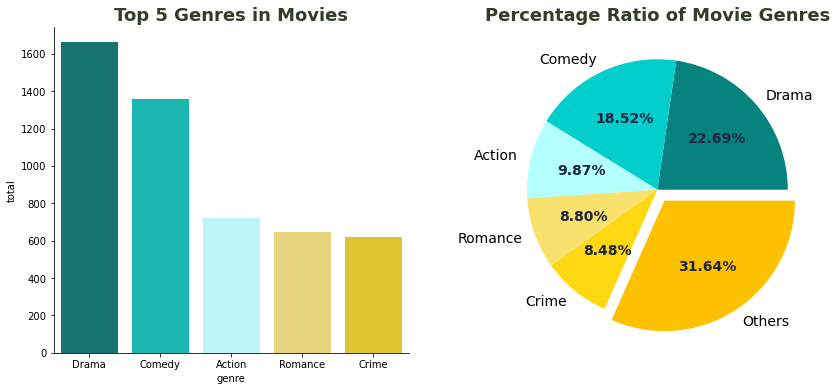

In [39]:
# Drop the non-duplicate movies
non_dup_movies = movielens_imdb_wiki.drop_duplicates('Plot').copy()

# Create list of genres
genres_list = []
for i in non_dup_movies['genres_y']:
    genres_list.extend(i.split(','))

# Instantiate plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# Create barplot
df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], 
                 palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])

ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()

# Create pie chart
df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')

wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), 
                                       explode=[0,0,0,0,0,0.1], 
                                       colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off');

From the above, we can see a few takeaways:

* Drama is the most dominant genre with over 1600 movies
* Out of the top 5 genres, there are still many genres in the dataset. They hold 31.64% of the total genres of the movies.

Let's see if we can look at all of the genres in a different format.

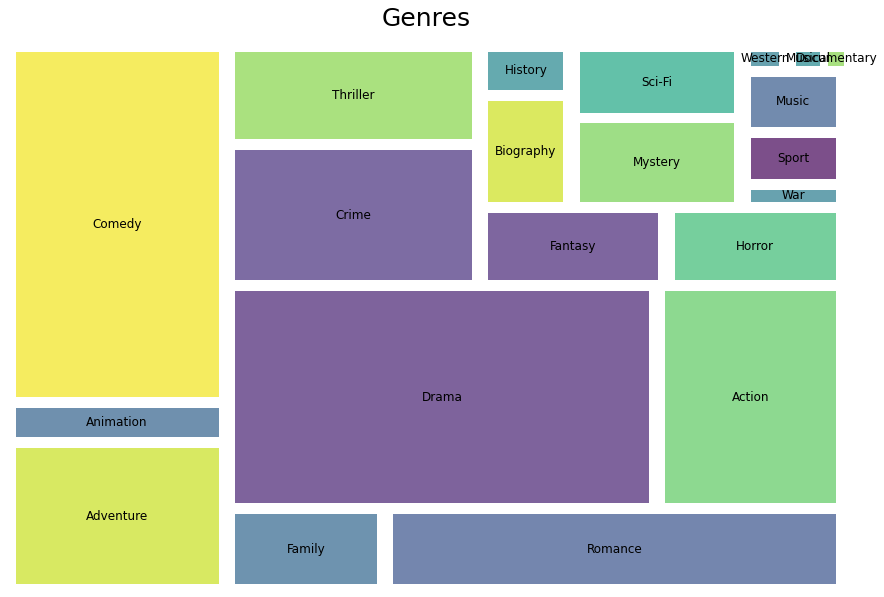

In [40]:
genres_info = Counter(genres_list)

plt.figure(figsize=(15, 10))
plt.title("Genres", fontsize=25, pad=20)
squarify.plot(genres_info.values(), label=genres_info.keys(), text_kwargs={'fontsize':12}, 
              bar_kwargs={'alpha':.7}, pad=True)
plt.axis("off");

We have the same data as our first visual, but this time we can see all of the genres. 

Next, let's take a look to see what year our movies were released.

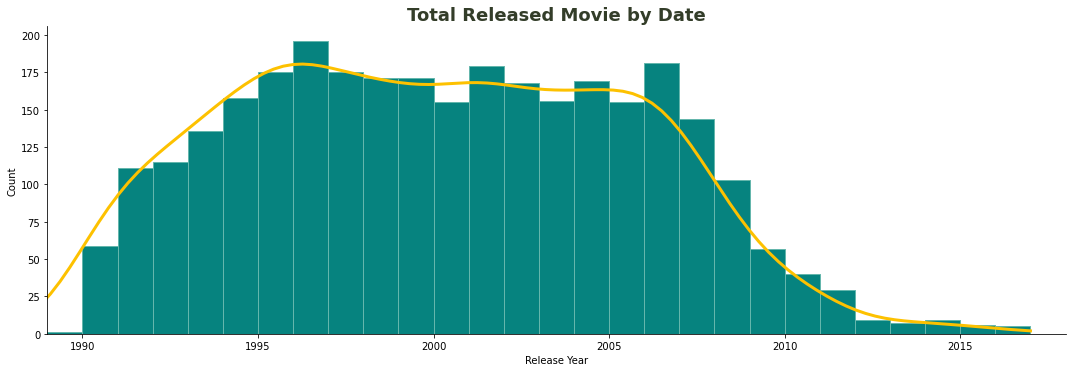

In [41]:
# Change Release Year to integer
non_dup_movies['Release Year'] = non_dup_movies['Release Year'].astype(int)

sns.displot(data=non_dup_movies, x='Release Year', kind='hist', kde=True, bins=55,
            color='#fdc100', facecolor='#06837f', edgecolor='#64b6ac', line_kws={'lw': 3}, aspect=3)

plt.title('Total Released Movie by Date', fontsize=18, weight=600, color='#333d29')
plt.xlim(1989, 2018);

As we can see above, the movies in our dataset were released from 1989 through 2017. There is a bit of a gaussian distribution, but for the most part it is pretty evenly distributed. 

Next, let's take a look and see if the movies that are the most popular are the highest rated.

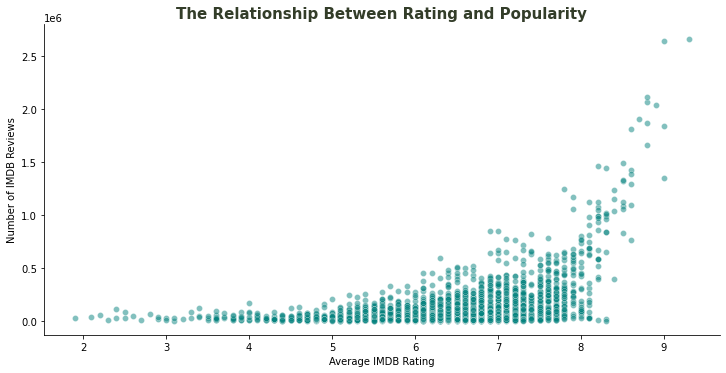

In [42]:
sns.relplot(data=non_dup_movies, x='averageRating', y='numVotes', alpha=.5, aspect=2, color='#06837f')

plt.title('The Relationship Between Rating and Popularity', fontsize=15, weight=600, color='#333d29')
plt.xlabel('Average IMDB Rating')
plt.ylabel('Number of IMDB Reviews');

As we can see here, it looks like films that have higher IMDB ratings do tend to have more IMDB reviews.

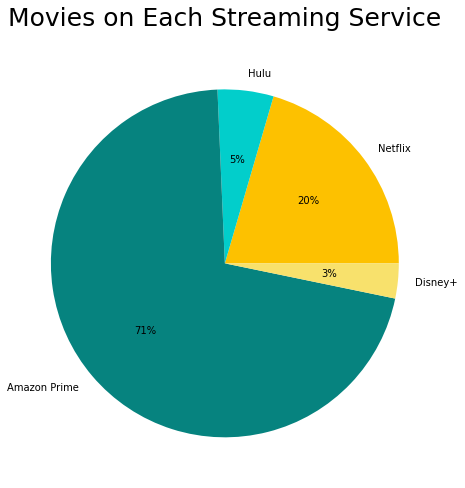

In [43]:
plt.figure(figsize=(8, 8))

# Get totals for each streaming service
netflix_sum = streaming_df['Netflix'].sum().round(0)
hulu_sum = streaming_df['Hulu'].sum().round(0)
prime_sum = streaming_df['Prime Video'].sum().round(0)
disney_sum = streaming_df['Disney+'].sum().round(0)

# Define data
data = [netflix_sum, hulu_sum, prime_sum, disney_sum]
labels = ['Netflix', 'Hulu', 'Amazon Prime', 'Disney+']

colors= ['#fdc100', '#02cecb', '#06837f', '#f8e16c']

# Create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Movies on Each Streaming Service", fontsize=25, pad=20)
plt.show()

Above we can see that the majority of movies between our 4 streaming services are available on Amazon Prime Video at 71%, followed by Netflix at 20%. Disney and Hulu have significantly less movies available therefore we would expect our recommendation engine to recommend those OTT platforms much less frequently than Amazon Prime and Netflix. 

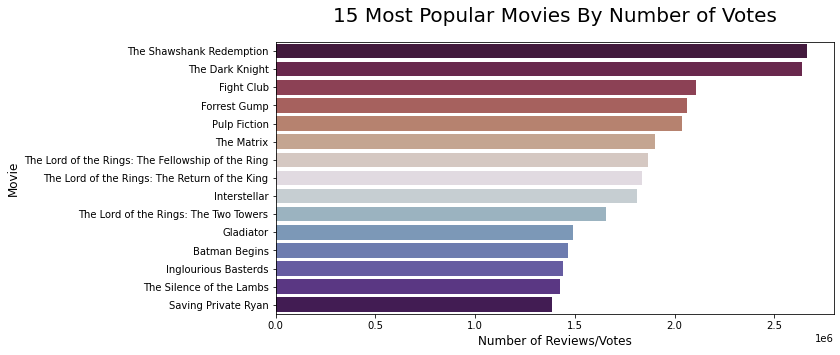

In [44]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,5))

# Get top 15 movies
top_15_popular = non_dup_movies.sort_values(by='numVotes', ascending=False)[:15]

# Plot the data
sns.barplot(data= top_15_popular, x='numVotes', y='primaryTitle', palette='twilight_shifted_r')
plt.title("15 Most Popular Movies By Number of Votes", fontsize=20, pad=20)
plt.xlabel('Number of Reviews/Votes', fontsize=12)
plt.ylabel('Movie', fontsize=12);

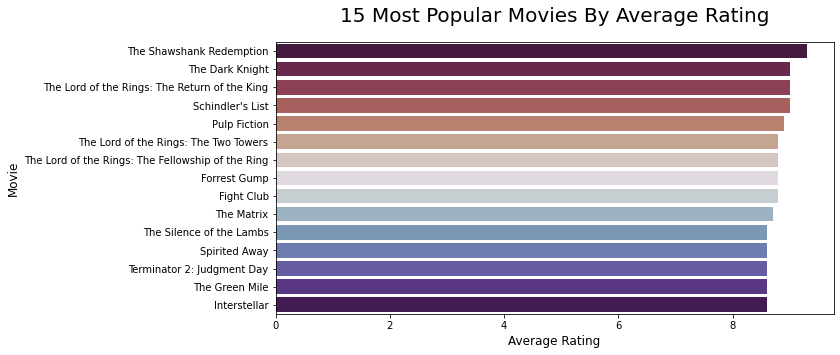

In [45]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,5))

# Get top 15 movies
top_15_popular = non_dup_movies.sort_values(by='averageRating', ascending=False)[:15]

# Plot the data
sns.barplot(data= top_15_popular, x='averageRating', y='primaryTitle', palette='twilight_shifted_r')
plt.title("15 Most Popular Movies By Average Rating", fontsize=20, pad=20)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Movie', fontsize=12);

As we can see above, these two charts have slight differences. *The Shawshank Redemption* and *The Dark Knight* are the two most reviewed movies and also have the highest average rating from IMDB. However from there, the two lists take different turns with *Fight Club* being the third most reviewed and *The Lord of the Rings: The Return of the King* having the third highest average rating.

In [114]:
colors=['#08b459', '#0a8306', '#837f06', '#7f0683', '#400683', '#064883', '#06837f',
        '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100']